# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Background: Success of a used car dealerships depends on their ability to sell their vehicle inventory at the highest price per car possible. Unlike brand dealerships, used car dealerships have flexibility to select their inventory of vehicles. Thus, they make decisions based on which cars they believe will hold the highest demand and customer price. 

Project Objectives: Provide guidance to the dealership as to which cars will sell for the highest prices. 

Data Problem Definition: Identify the features within the dataset that are correlated with the highest price vehicles


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

As I explore the datasets, some steps I aim to achieve are: 

- Identify null values
- Explore averages and outliers
- Review correlations between parameters
- Review histograms of categorical information 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from category_encoders.target_encoder import TargetEncoder

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## Data Cleaning and Processing
Previous Cleanup Steps
- We narrowed the dataset to cars in the price range of 2,000-50,000 which is more reflective of a used car lot
- We removed cars with odometers greater than 250,000
- We removed cars that are older than 1950
- There are too many Regions (404) to consider. We will remove the Region column from the analysis and rely on state for geography considerations
- Similarly, there are too many models (>16,000) to consider for this analysis

Further cleanup steps taken below
- There are a number of null values. We will have to assess what to do with those values, incuding: remove the column entirely, remove the null values, match the null values to another value

Prices for some of the cars are way too high ! We are going to narrow the range of car prices to those typical of a used car lot

In [7]:
# Find price values that make sense
# Upper limit was determining by identifying outliers and using knowledge about car models

a_vehicles = vehicles
a_vehicles = a_vehicles[a_vehicles['price'] < 50000 ]
a_vehicles = a_vehicles[a_vehicles['price'] > 2000]
a_vehicles = a_vehicles[a_vehicles['odometer'] < 250000]
a_vehicles = a_vehicles[a_vehicles['year'] > 1950]

a_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349783 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            349783 non-null  int64  
 1   region        349783 non-null  object 
 2   price         349783 non-null  int64  
 3   year          349783 non-null  float64
 4   manufacturer  338520 non-null  object 
 5   model         346523 non-null  object 
 6   condition     220907 non-null  object 
 7   cylinders     207254 non-null  object 
 8   fuel          347728 non-null  object 
 9   odometer      349783 non-null  float64
 10  title_status  344054 non-null  object 
 11  transmission  348389 non-null  object 
 12  VIN           219921 non-null  object 
 13  drive         243981 non-null  object 
 14  size          98266 non-null   object 
 15  type          277678 non-null  object 
 16  paint_color   251517 non-null  object 
 17  state         349783 non-null  object 
dtypes: 

(array([64739., 65580., 49431., 42867., 34861., 29128., 26314., 21315.,
         9345.,  6203.]),
 array([ 2004. ,  6803.5, 11603. , 16402.5, 21202. , 26001.5, 30801. ,
        35600.5, 40400. , 45199.5, 49999. ]),
 <BarContainer object of 10 artists>)

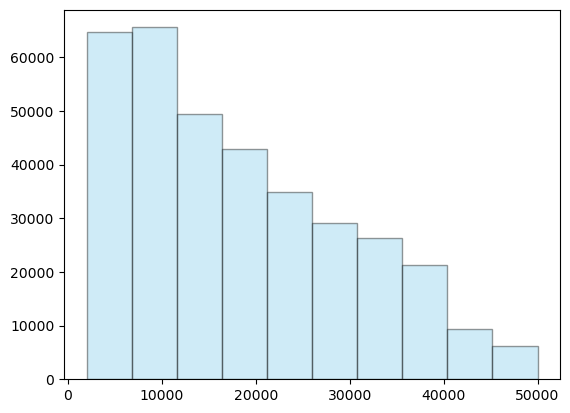

In [8]:
plt.hist(a_vehicles['price'], alpha = 0.4, bins = 10, color='skyblue', edgecolor='black')

<Axes: ylabel='price'>

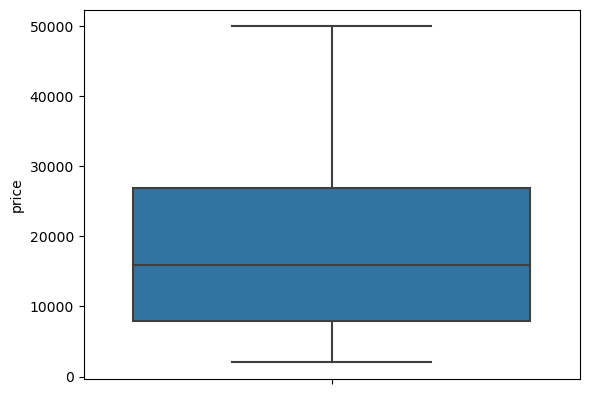

In [9]:
sns.boxplot(y=a_vehicles['price'])

In [199]:
# Figure out how many are N/a so that we can clean up dataset
nan_counts = {}

for column in a_vehicles.columns: 
    nan_count = a_vehicles[column].isna().sum()
    nan_counts[column] = nan_count

print(nan_counts)

{'id': 0, 'region': 0, 'price': 0, 'year': 0, 'manufacturer': 11263, 'model': 3260, 'condition': 128876, 'cylinders': 142529, 'fuel': 2055, 'odometer': 0, 'title_status': 5729, 'transmission': 1394, 'VIN': 129862, 'drive': 105802, 'size': 251517, 'type': 72105, 'paint_color': 98266, 'state': 0}


In [55]:
columns_to_drop = ['region', 'VIN']

In [56]:
df = a_vehicles.drop(columns=columns_to_drop)

In [201]:
columns_to_drop_2 = ['paint_color', 'VIN', 'region', 'fuel']
df_Z = a_vehicles.drop(columns=columns_to_drop_2)

nan_counts = {}

for column in df_Z.columns: 
    nan_count = df_Z[column].isna().sum()
    nan_counts[column] = nan_count

print(nan_counts)

{'id': 0, 'price': 0, 'year': 0, 'manufacturer': 11263, 'model': 3260, 'condition': 128876, 'cylinders': 142529, 'odometer': 0, 'title_status': 5729, 'transmission': 1394, 'drive': 105802, 'size': 251517, 'type': 72105, 'state': 0}


In [57]:
#See how many unique values there are per column
unique_values = {}

for column in a_vehicles.columns:
    if a_vehicles[column].dtype == 'object':
        unique_vals = a_vehicles[column].unique()
        unique_values[column] = unique_vals
    
# print(unique_values)
unique_count = df.nunique()
print(unique_count)

id              349783
price            12810
year                72
manufacturer        42
model            24244
condition            6
cylinders            8
fuel                 5
odometer         90727
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


In [41]:
#See how many unique values there are per column
unique_values = {}

for column in a_vehicles.columns:
    if a_vehicles[column].dtype == 'object':
        unique_vals = a_vehicles[column].unique()
        unique_values[column] = unique_vals
    
print(unique_values)
# unique_count = df.nunique()
# print(unique_count)

{'region': array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', '

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349783 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            349783 non-null  int64  
 1   price         349783 non-null  int64  
 2   year          349783 non-null  float64
 3   manufacturer  338520 non-null  object 
 4   model         346523 non-null  object 
 5   condition     220907 non-null  object 
 6   cylinders     207254 non-null  object 
 7   fuel          347728 non-null  object 
 8   odometer      349783 non-null  float64
 9   title_status  344054 non-null  object 
 10  transmission  348389 non-null  object 
 11  drive         243981 non-null  object 
 12  size          98266 non-null   object 
 13  type          277678 non-null  object 
 14  paint_color   251517 non-null  object 
 15  state         349783 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 45.4+ MB


## Exploratory Data Analysis
Next, we will do some exploration to asses the impact of the features on price and correlation
- Correlation Matrix


In [43]:
numeric_features = ['year', 'odometer']  # Numeric features to analyze
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']  # Categorical features to analyze

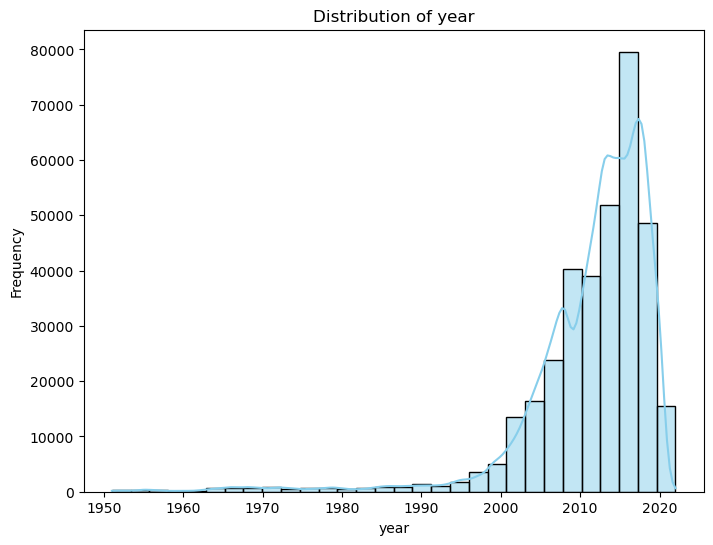

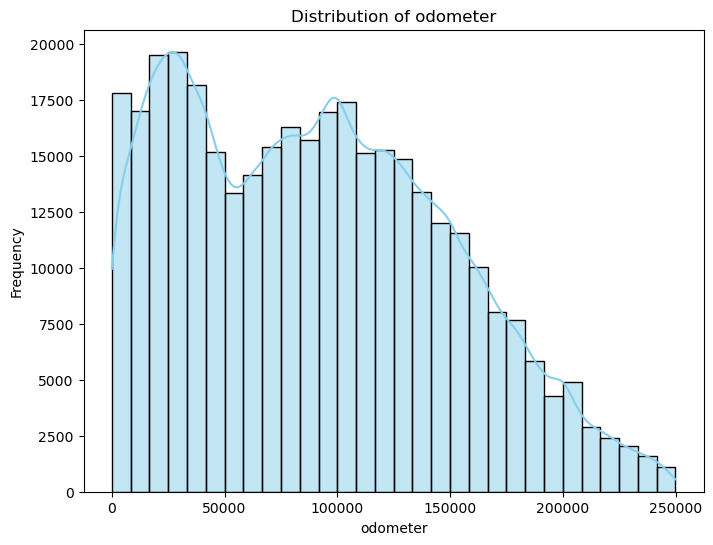

In [44]:
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

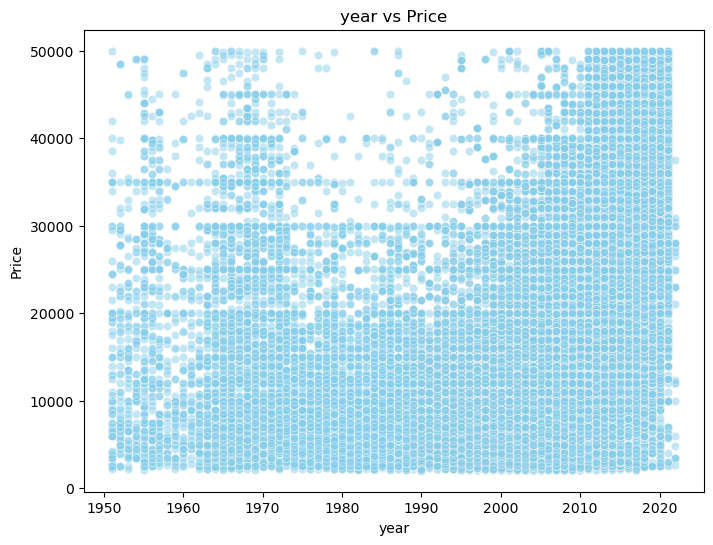

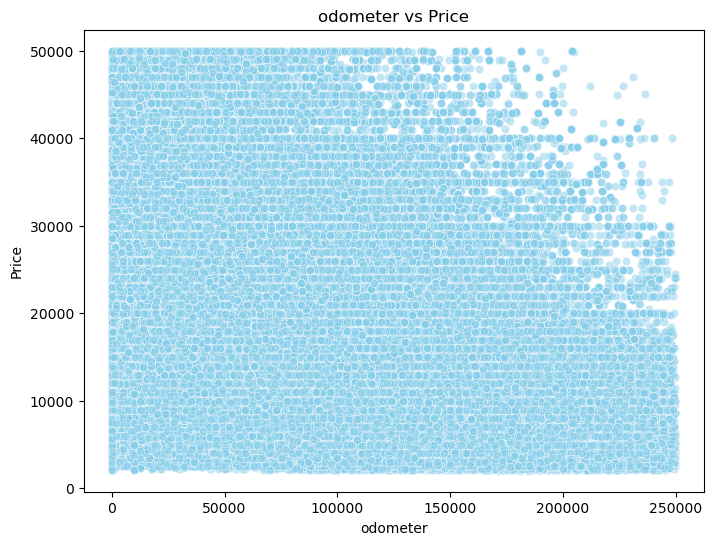

In [19]:
# Visualize relationships between numeric features and the target variable using scatter plots
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.5, color='skyblue')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

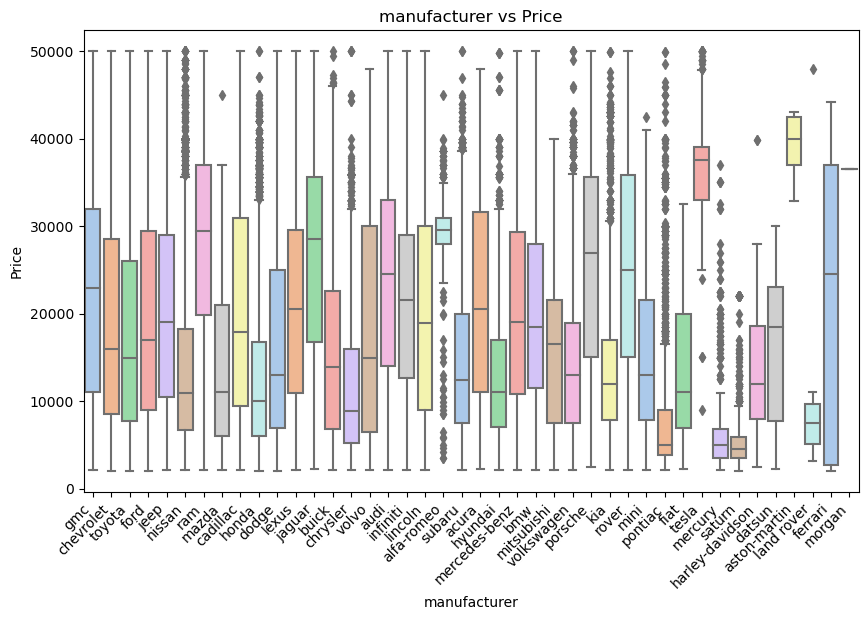

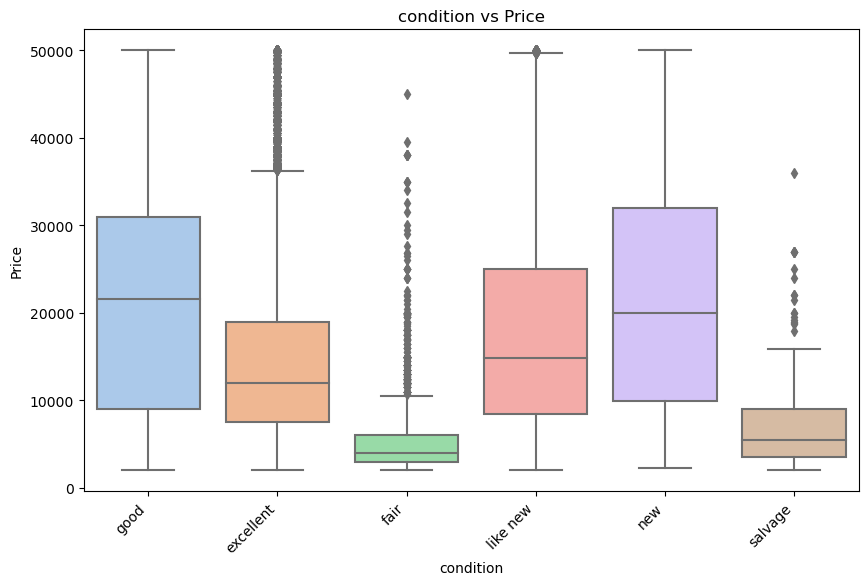

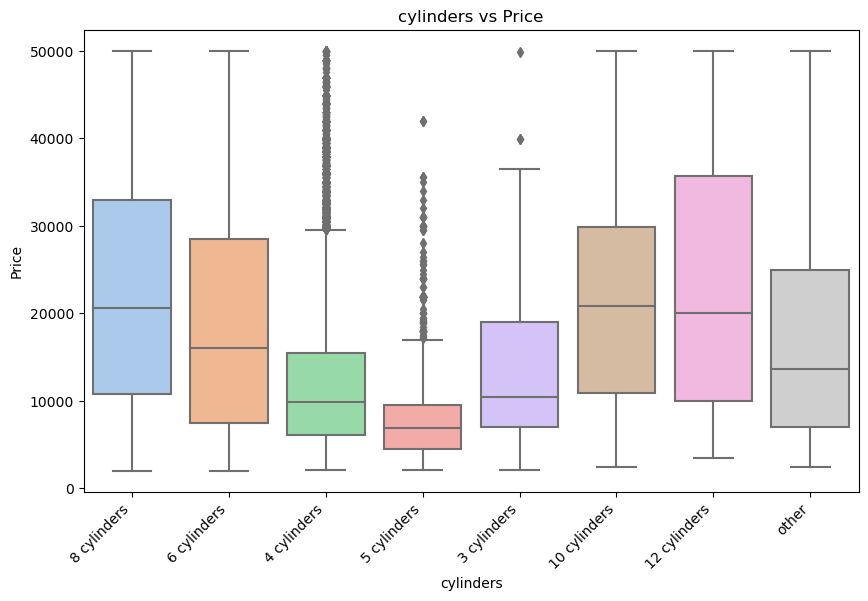

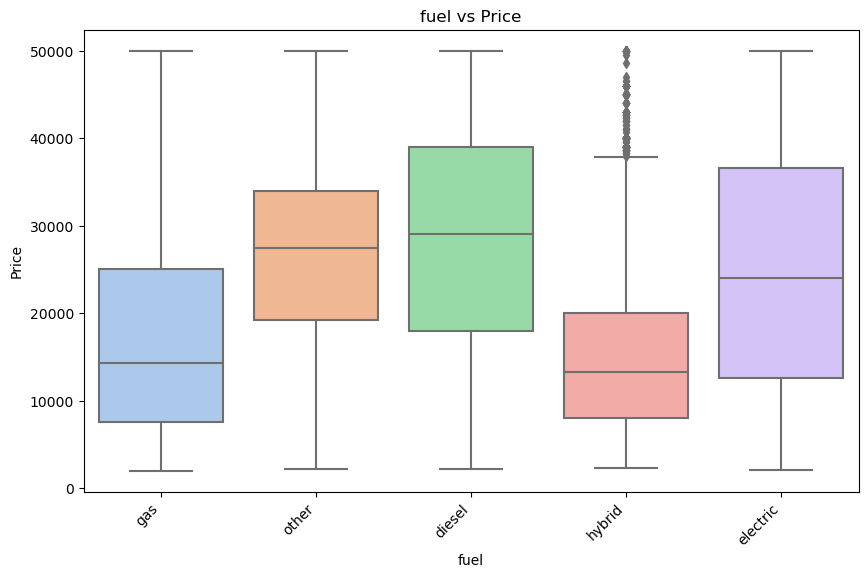

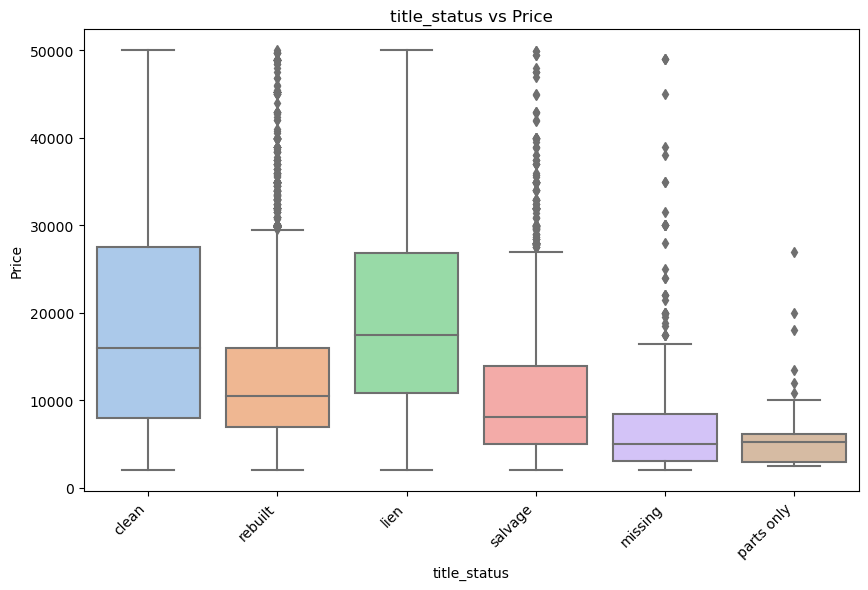

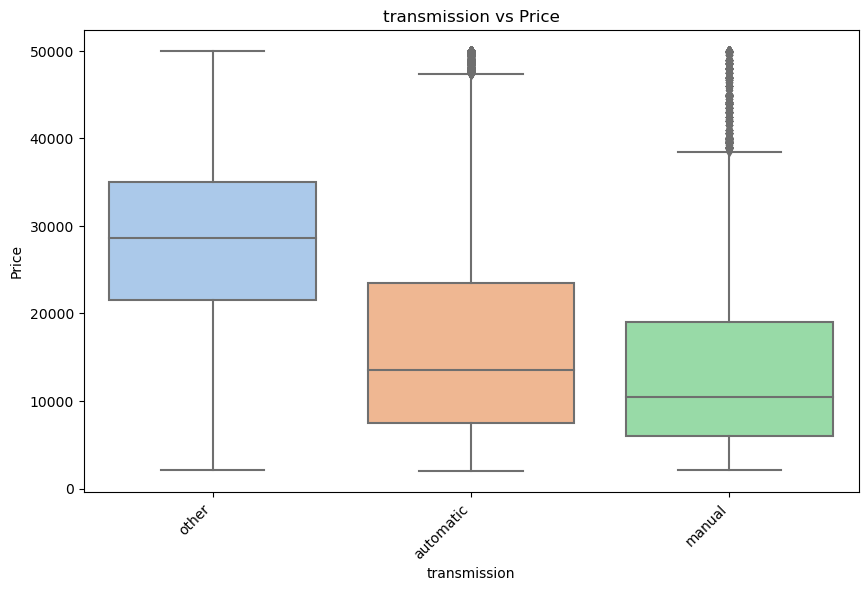

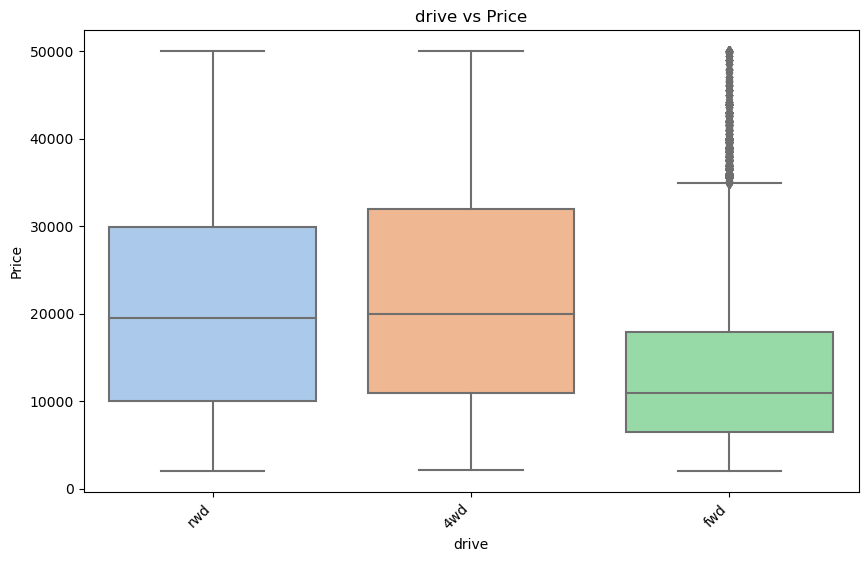

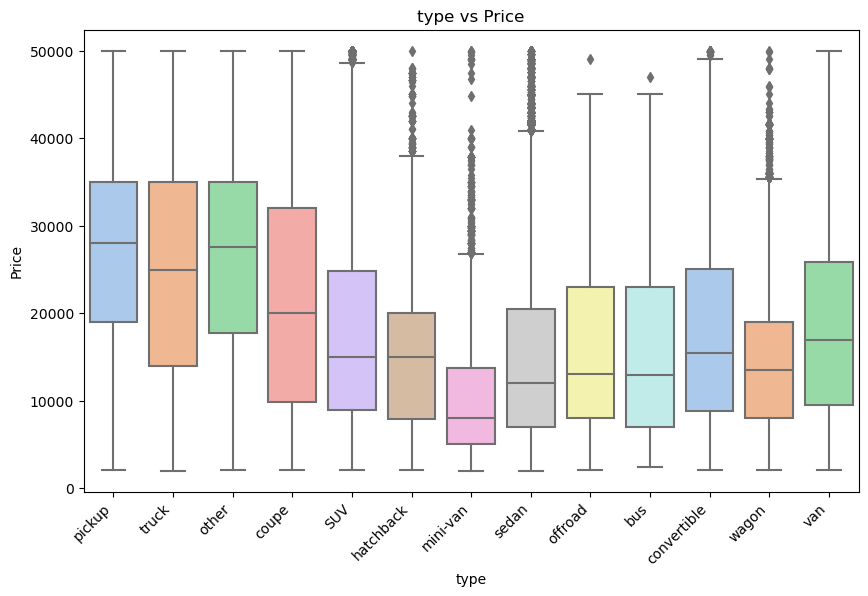

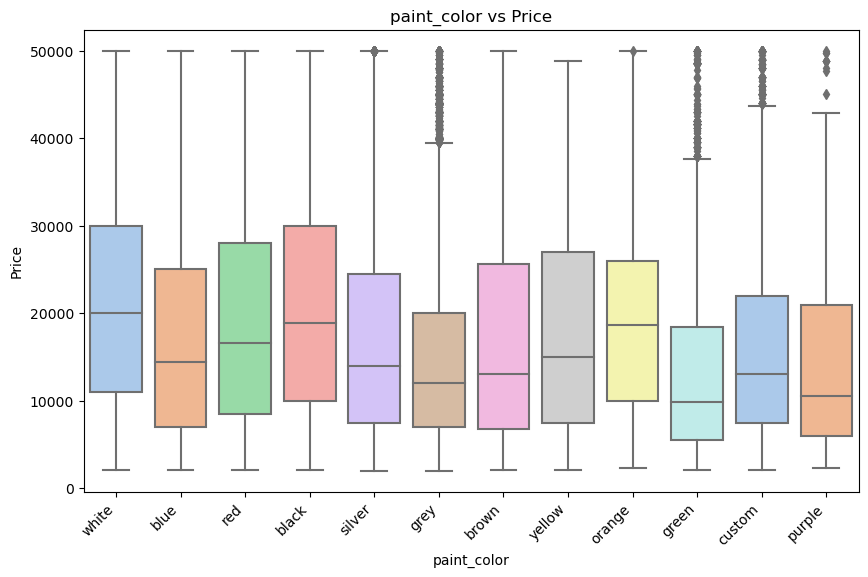

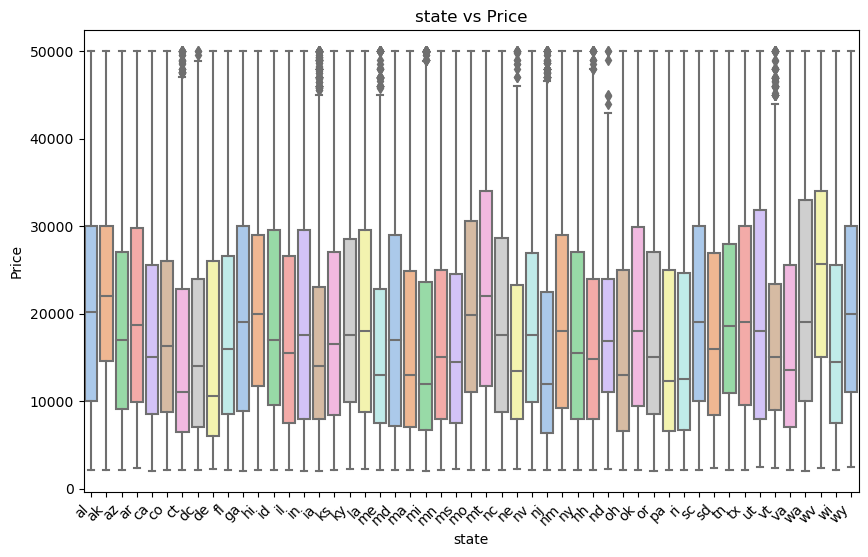

In [45]:
# Visualize relationships between categorical features and the target variable using box plots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='price', palette='pastel')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

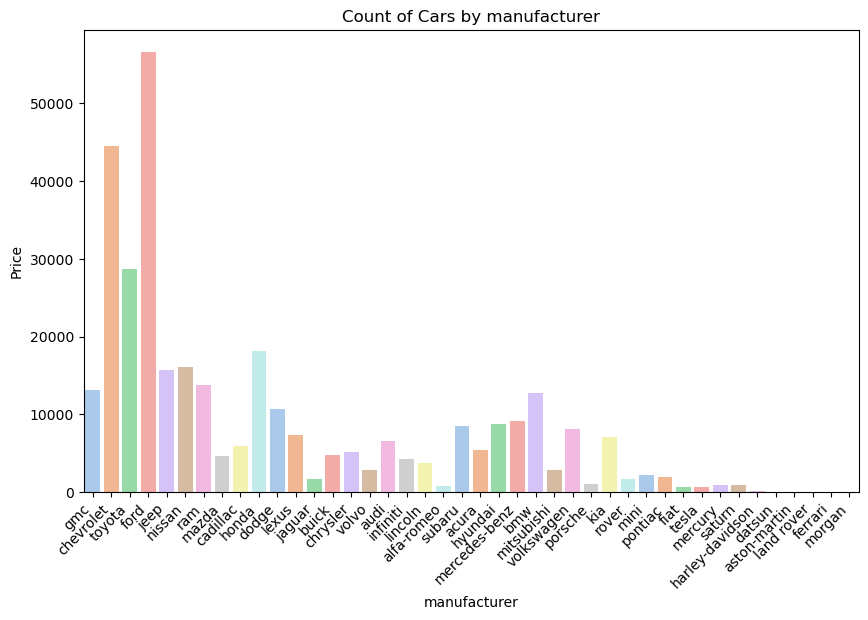

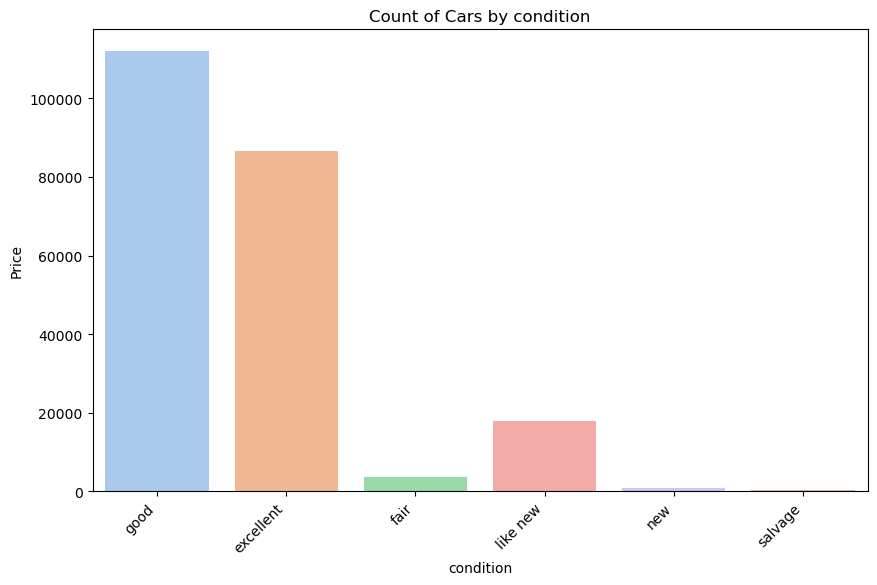

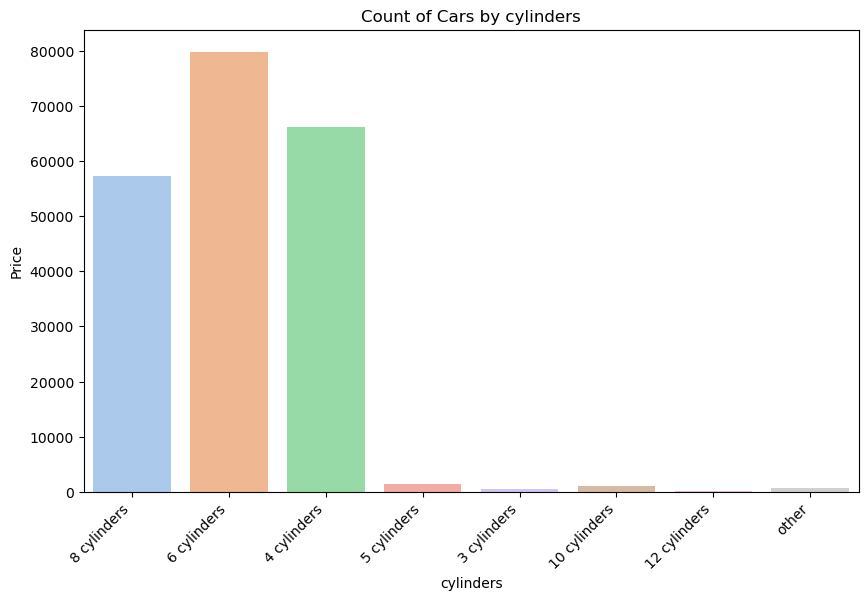

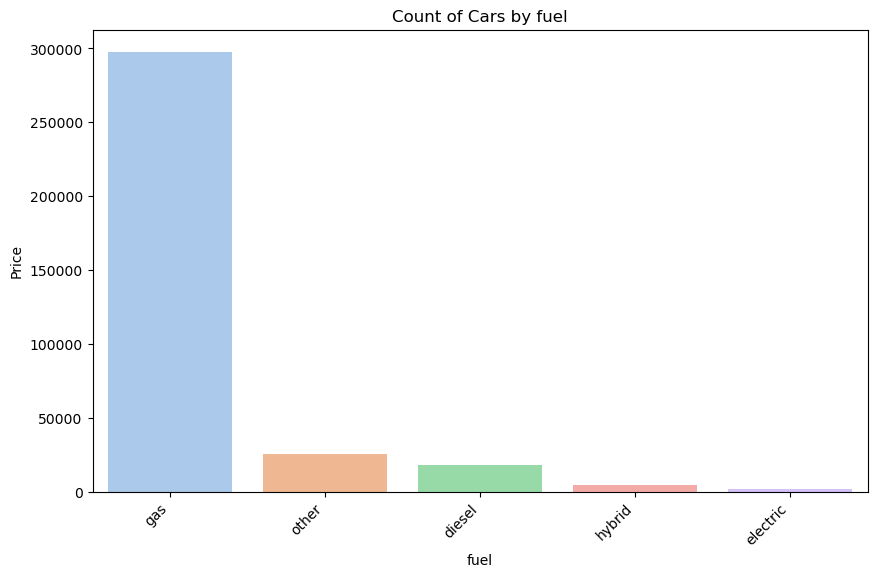

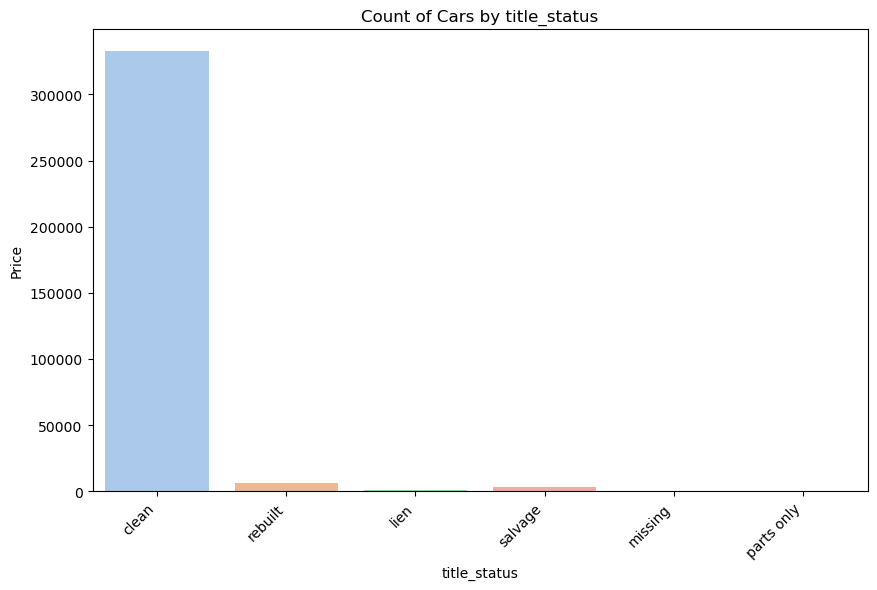

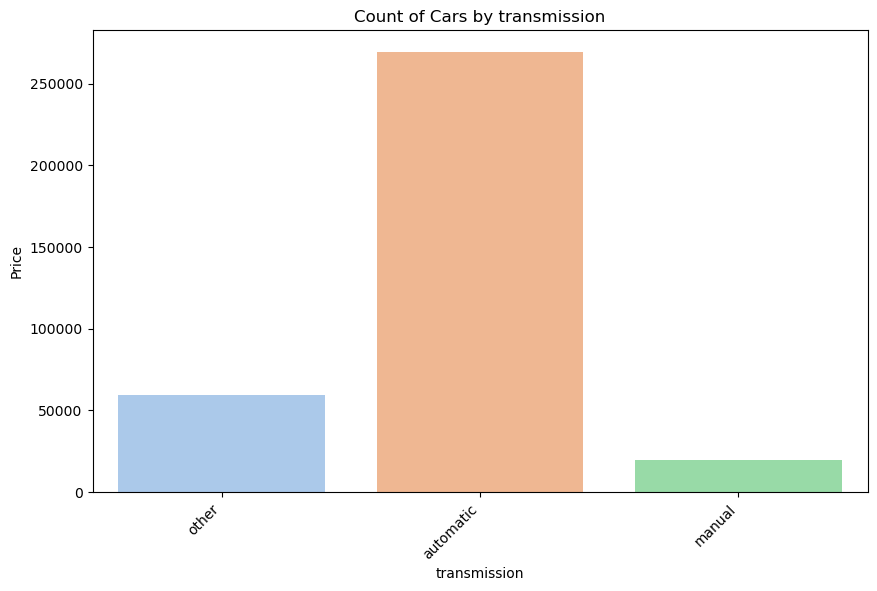

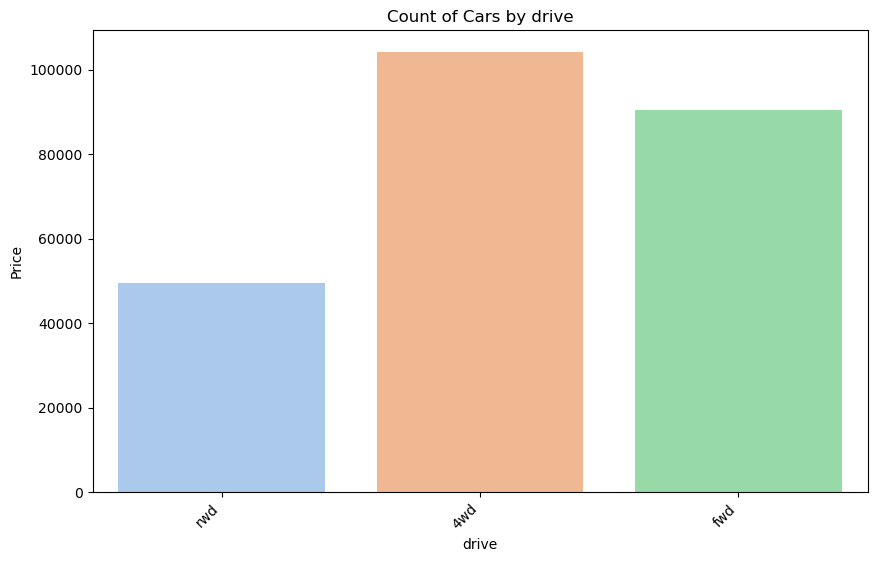

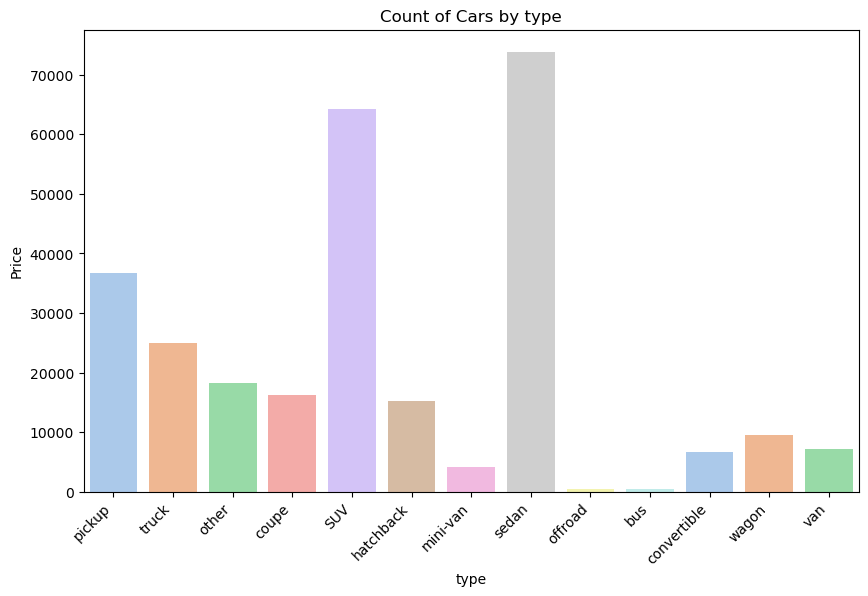

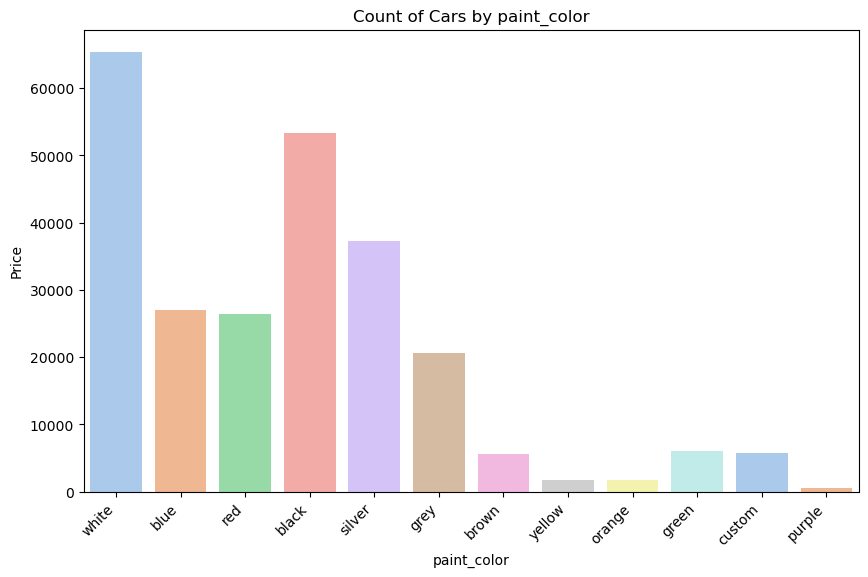

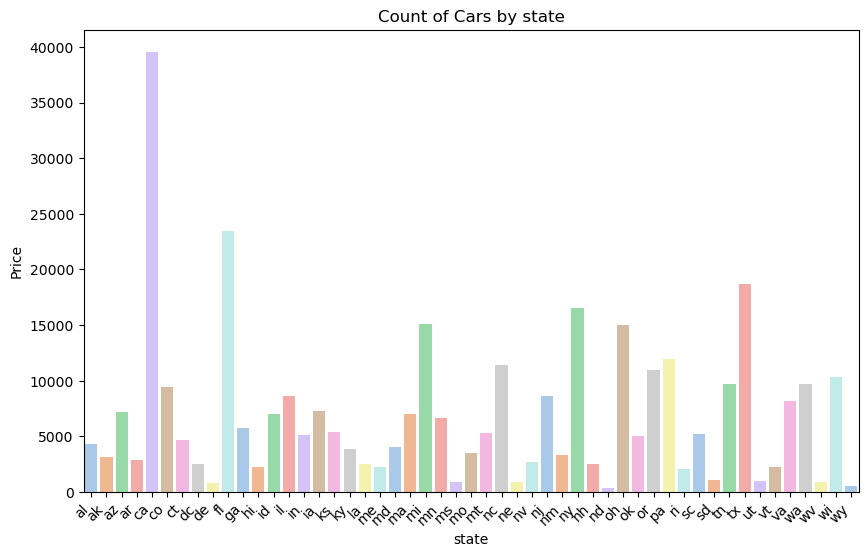

In [226]:
# Visualize relationships between categorical features and the target variable using box plots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=a_vehicles, x=feature, palette='pastel')
    plt.title(f'Count of Cars by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

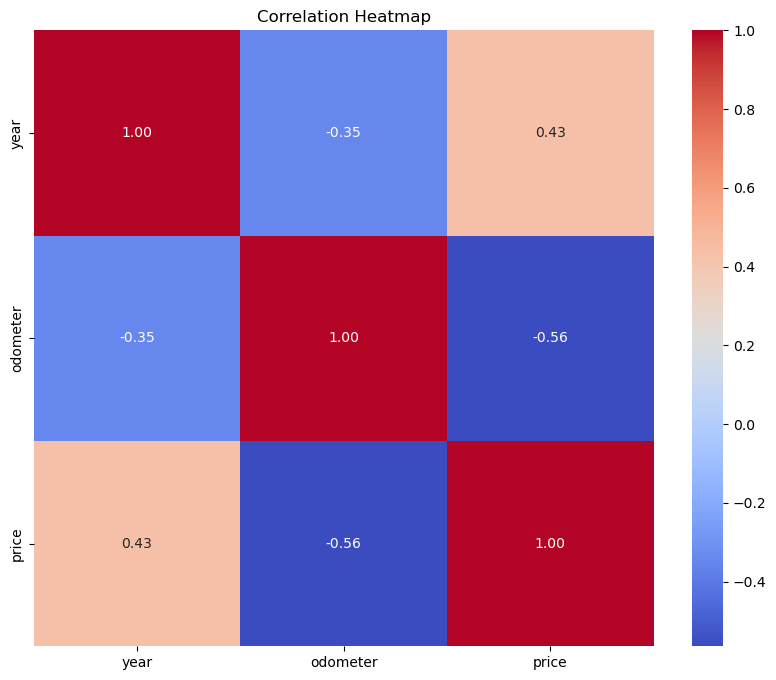

In [47]:
# Analyze correlations between numeric features and the target variable using correlation matrices or heatmaps
correlation_matrix = df[numeric_features + ['price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349783 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            349783 non-null  int64  
 1   price         349783 non-null  int64  
 2   year          349783 non-null  float64
 3   manufacturer  338520 non-null  object 
 4   model         346523 non-null  object 
 5   condition     220907 non-null  object 
 6   cylinders     207254 non-null  object 
 7   fuel          347728 non-null  object 
 8   odometer      349783 non-null  float64
 9   title_status  344054 non-null  object 
 10  transmission  349783 non-null  int32  
 11  drive         349783 non-null  int32  
 12  size          98266 non-null   object 
 13  type          349783 non-null  int32  
 14  paint_color   251517 non-null  object 
 15  state         349783 non-null  object 
 16  car_age       349783 non-null  float64
dtypes: float64(3), int32(3), int64(2), object(9)
me

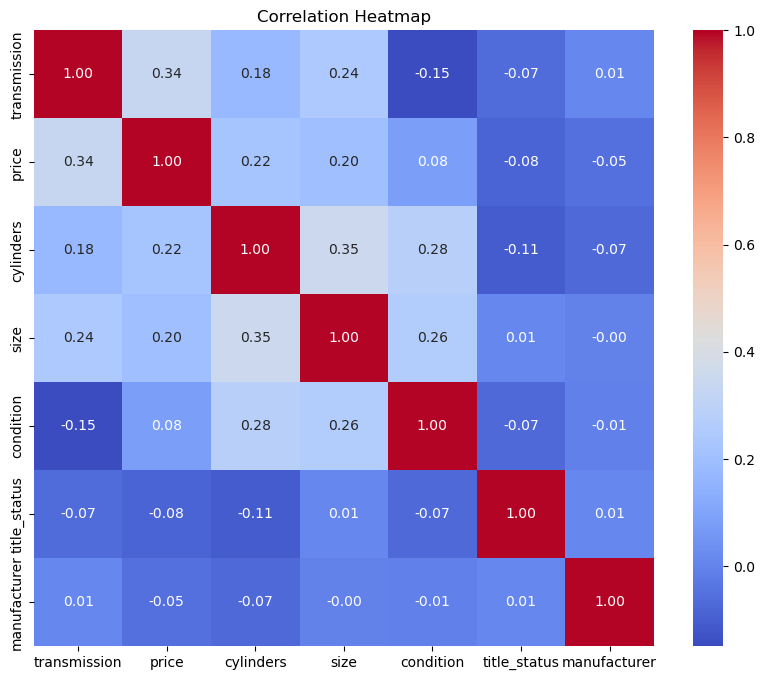

In [198]:
df_encoded = df

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['transmission'] = label_encoder.fit_transform(df_encoded['transmission'])
df_encoded['drive'] = label_encoder.fit_transform(df_encoded['drive'])
df_encoded['type'] = label_encoder.fit_transform(df_encoded['type'])
df_encoded['manufacturer'] = label_encoder.fit_transform(df_encoded['manufacturer'])
df_encoded['cylinders'] = label_encoder.fit_transform(df_encoded['cylinders'])
df_encoded['size'] = label_encoder.fit_transform(df_encoded['size'])
df_encoded['condition'] = label_encoder.fit_transform(df_encoded['condition'])
df_encoded['title_status'] = label_encoder.fit_transform(df_encoded['title_status'])
df_encoded['paint_color'] = label_encoder.fit_transform(df_encoded['paint_color'])
df_encoded['model'] = label_encoder.fit_transform(df_encoded['model'])
df_encoded['state'] = label_encoder.fit_transform(df_encoded['state'])





correlation_matrix_2 = df_encoded[['transmission', 'price', 'cylinders', 'size', 'condition', 'title_status',
#                                    'drive', 'type',
#                                   'paint_color', 'model', 
                                   'manufacturer']].corr(method='pearson', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [58]:
vehicles_clean = a_vehicles.drop(columns = ['condition', 'VIN', 'drive', 'paint_color','type', 'size', 'cylinders'])
vehicles_clean = vehicles_clean.dropna()
df_clean = vehicles_clean
# df.info()

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326930 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            326930 non-null  int64  
 1   region        326930 non-null  object 
 2   price         326930 non-null  int64  
 3   year          326930 non-null  float64
 4   manufacturer  326930 non-null  object 
 5   model         326930 non-null  object 
 6   fuel          326930 non-null  object 
 7   odometer      326930 non-null  float64
 8   title_status  326930 non-null  object 
 9   transmission  326930 non-null  object 
 10  state         326930 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 29.9+ MB


In [ ]:
# df.sort_values(by='odometer', ascending=True).head(5)

## Feature Engineering
Lets now do some feature engineering so we can create some models


In [50]:
from datetime import datetime

#### Plan
- region: TargetEncoding
- price: separate
- year: Let's convert to age of car
- manufacturer: remove
- Model: TargetEncode
- fuel: OneHot
- odometer: standardize
- title_status: OrdinalEncoder ['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
- transmission: oneHot
- state: remove

- Apply a Standard Scaler

In [59]:
current_year = datetime.now().year
df['car_age'] = current_year - df['year']
df_clean['car_age'] = current_year - df['year']

In [60]:
# Figure out how many are N/a so that we can clean up dataset
nan_counts = {}

for column in df.columns: 
    nan_count = df[column].isna().sum()
    nan_counts[column] = nan_count

print(nan_counts)

{'id': 0, 'price': 0, 'year': 0, 'manufacturer': 11263, 'model': 3260, 'condition': 128876, 'cylinders': 142529, 'fuel': 2055, 'odometer': 0, 'title_status': 5729, 'transmission': 1394, 'drive': 105802, 'size': 251517, 'type': 72105, 'paint_color': 98266, 'state': 0, 'car_age': 0}


In [91]:
df_cleaned = df.dropna()
df_length = len(df_cleaned)
print("Length of new dataset: ", df_length)

Length of new dataset:  68064


## Modeling
Models
- Model attempt 1 - I removed all null values from my dataframe and ran a linear regression model. This which left me with 68,000 rows. This resulted in a poor
> - Mean Squared Error: 38,163,686.643980384
> - R-squared: 0.6413089969257844

- Model attempt 2 - I removed only a select number of columns, including: 'cylinders', 'drive', 'type', 'paint_color', 'size', 'condition'. These all had a high number of null values. This resulted in a bigger dataset of 330,000 rows, but the results were still poor
> - Mean Squared Error: 58,648,769
> - R-squared: 0.58194362844

- Model attempt 3 - For this process, I used different imputers to handle then null values. For the object columns, I used the most frequent. And for the numberic columns I used the mean imputer. Unfortunately, this did not result in a stronger performance in the model and the mean squared error was actually reduced. 
> - Mean Squared Error: 49,160,600.02227631
> - R-squared: 0.6503274754523738

- Model attempt 1.B - For this process, I used the same dataset as model 1, which was all null values are removed. However, I used Ridge hyperparametertuning. It resulted in a slightly poorer MSE as compared to without the ridge tuning
> - Mean Squared Error: 38,970,191.33131313
> - R-squared: 0.6503274754523738

- Model Attempt 4 - Finally a good outcome ! For this attempt, I leveraged Label Encoding for my data pre-processing and modeled it using a RandomForestRegressor. It resulted in a much stronger performance within an acceptable range
> - Mean Squared Error: 13,743,718
> - R-squared: 0.90224


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Model 1 - Remove all rows with a null value

In [114]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68064 entries, 31 to 426833
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            68064 non-null  int64  
 1   price         68064 non-null  int64  
 2   year          68064 non-null  float64
 3   manufacturer  68064 non-null  object 
 4   model         68064 non-null  object 
 5   condition     68064 non-null  object 
 6   cylinders     68064 non-null  object 
 7   fuel          68064 non-null  object 
 8   odometer      68064 non-null  float64
 9   title_status  68064 non-null  object 
 10  transmission  68064 non-null  object 
 11  drive         68064 non-null  object 
 12  size          68064 non-null  object 
 13  type          68064 non-null  object 
 14  paint_color   68064 non-null  object 
 15  state         68064 non-null  object 
 16  car_age       68064 non-null  float64
dtypes: float64(3), int64(2), object(12)
memory usage: 9.3+ MB


In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

# Specify columns for ordinal encoding
ordinal_features = ['title_status', 'condition']
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean'],
                                            ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]))
])


onehot_features = ['fuel', 'transmission', 'cylinders', 'manufacturer', 'drive', 'type', 'paint_color' ]
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', 
                             handle_unknown='ignore')
    )
])

# Assuming you have identified columns to scale (replace 'numeric_features' with actual column names)
numeric_features = ['car_age', 'odometer']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_features),
        ('onehot', onehot_transformer, onehot_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Integrate with main pipeline
# pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('linreg', LinearRegression())
# ])

In [141]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('linear_reg', LinearRegression())  # Linear regression model
])

In [172]:
# Specify features (X) and target variable (y)
X = df_cleaned.drop(columns=['price', 'size', 'state', 'year', 'model', 'manufacturer'])  # Drop 'price' column to get features
y = df_cleaned['price']  # Get the 'price' column as the target variable

In [173]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68064 entries, 31 to 426833
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            68064 non-null  int64  
 1   condition     68064 non-null  object 
 2   cylinders     68064 non-null  object 
 3   fuel          68064 non-null  object 
 4   odometer      68064 non-null  float64
 5   title_status  68064 non-null  object 
 6   transmission  68064 non-null  object 
 7   drive         68064 non-null  object 
 8   type          68064 non-null  object 
 9   paint_color   68064 non-null  object 
 10  car_age       68064 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.2+ MB


In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['parts '
                                                                                               'only',
                                                                                               'missing',
                                                                                               'salvage',
                                                                                               'lien',
                                                                                               'rebuilt',
                                                                                               'clean'],
                                                                                              ['salvage',
                                                                                               'fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['title_status',
                                                   'condition']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['fuel', 'transmission',
                                                   'cylinders', 'manufacturer',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['car_age', 'odometer'])])),
                ('linear_reg', LinearRegression())])

In [145]:
# Make predictions on the test data
y_pred = model.predict(X_test)

C:\Users\blake\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [146]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 38957042.77408335
R-squared: 0.6313350347977797


### Model 1.B Parameter Optimization

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

# Specify columns for ordinal encoding
ordinal_features = ['title_status', 'condition']
aa_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean'],
                                            ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]))
])


onehot_features = ['fuel', 'transmission', 'cylinders', 'manufacturer', 'drive', 'type', 'paint_color' ]
aa_onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

# Assuming you have identified columns to scale (replace 'numeric_features' with actual column names)
numeric_features = ['car_age', 'odometer']
aa_numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create column transformer
aa_preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_features),
        ('onehot', onehot_transformer, onehot_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Integrate with main pipeline
# pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('linreg', LinearRegression())
# ])

In [176]:
aa_X = aa_preprocessor.fit_transform(df_cleaned)

In [177]:
aa_X_train, aa_X_test, aa_y_train, aa_y_test = train_test_split(aa_X, df_cleaned['price'], test_size=0.2, random_state=42)


In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define hyperparameters to tune
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Example values, you can adjust the range

# Create GridSearchCV objects
ridge_grid_search = GridSearchCV(Ridge(max_iter=10000), ridge_params, cv=5, scoring='neg_mean_squared_error')

# Fit the models
ridge_grid_search.fit(aa_X_train, aa_y_train)

# Get the best hyperparameters
best_ridge_params = ridge_grid_search.best_params_

# Use the best models for prediction
best_ridge_model = ridge_grid_search.best_estimator_

# Evaluate the models on the test set
ridge_test_mse = mean_squared_error(aa_y_test, best_ridge_model.predict(aa_X_test))
print(ridge_test_mse)


38970191.33131313


In [178]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data and target variable
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(aa_X_train, aa_y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a dictionary to store feature names and their importances
feature_importance_dict = {}
for feature, importance in zip(aa_X_train.columns, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature_importance_dict by importance values
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top features with their importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")


KeyboardInterrupt: 

### Model 2 - Remove columns with the greatest number of null values

In [ ]:
drop_columns = ['cylinders', 'drive', 'type', 'paint_color', 'size', 'condition']

In [ ]:
df_2 = df.drop(columns=drop_columns)

In [ ]:
# Figure out how many are N/a so that we can clean up dataset
nan_counts = {}

for column in df_2.columns: 
    nan_count = df_2[column].isna().sum()
    nan_counts[column] = nan_count

print(nan_counts)

In [ ]:
df_2 = df_2.dropna()

In [ ]:
df_length2 = len(df_2)
print("Length of new dataset: ", df_length2)

In [ ]:
df_2.info()

In [ ]:
# Specify columns for ordinal encoding
Bordinal_features = ['title_status']
Bordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean'],
                                            ]))
])


Bonehot_features = ['fuel', 'transmission', 'manufacturer']
Bonehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# Assuming you have identified columns to scale (replace 'numeric_features' with actual column names)
Bnumeric_features = ['car_age', 'odometer']
Bnumeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create column transformer
Bpreprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', Bordinal_transformer, Bordinal_features),
        ('onehot', Bonehot_transformer, Bonehot_features),
        ('num', Bnumeric_transformer, Bnumeric_features)
    ])

In [ ]:
# Define the model pipeline
Bmodel = Pipeline(steps=[
    ('preprocessor', Bpreprocessor),  # Preprocessing steps
    ('linear_reg', LinearRegression())  # Linear regression model
])

In [ ]:
# Specify features (X) and target variable (y)
BX = df_2.drop(columns=['price'])  # Drop 'price' column to get features
By = df_2['price']  # Get the 'price' column as the target variable

# Split the data into training and testing sets
BX_train, BX_test, By_train, By_test = train_test_split(BX, By, test_size=0.2, random_state=42)

In [ ]:
BX_train.columns

In [ ]:
# Fit the model to the training data
Bmodel.fit(BX_train, By_train)

In [ ]:
# Make predictions on the test data
By_pred = Bmodel.predict(BX_test)

In [ ]:
# Evaluate model performance
Bmse = mean_squared_error(By_test, By_pred)
Br2 = r2_score(By_test, By_pred)

print("Mean Squared Error:", Bmse)
print("R-squared:", Br2)

### Model 3



In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Specify columns for ordinal encoding
C_Cordinal_features = ['title_status', 'condition']
C_Cordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('ordinal', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean'],
                                            ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]))
])

C_onehot_features = ['fuel', 'transmission', 'cylinders', 'manufacturer', 'drive', 'type', 'paint_color']
C_onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('onehot', OneHotEncoder(drop='if_binary'))
])

# Assuming you have identified columns to scale (replace 'numeric_features' with actual column names)
C_numeric_features = ['car_age', 'odometer']
C_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values using mean
    ('scaler', StandardScaler())
])

# Create column transformer
C_preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', C_Cordinal_transformer, C_Cordinal_features),
        ('onehot', C_onehot_transformer, C_onehot_features),
        ('num', C_numeric_transformer, C_numeric_features)
    ])

# Append the model to the preprocessor
C_pipeline = Pipeline(steps=[('preprocessor', C_preprocessor),
                           ('classifier', LinearRegression())])

In [77]:
df_3 = df

In [78]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', C_preprocessor),  # Preprocessing steps
    ('linear_reg', LinearRegression())  # Linear regression model
])

# Specify features (X) and target variable (y)
C_X = df_3.drop(columns=['price'])  # Drop 'price' column to get features
C_y = df_3['price']  # Get the 'price' column as the target variable

# Split the data into training and testing sets
C_X_train, C_X_test, C_y_train, C_y_test = train_test_split(C_X, C_y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(C_X_train, C_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['parts '
                                                                                               'only',
                                                                                               'missing',
                                                                                               'salvage',
                                                                                               'lien',
                                                                                               'rebuilt',
                                                                                               'clean'],
                                                                                              ['salvage',
                                                                                               'fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['title_status',
                                                   'condition']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['fuel', 'transmission',
                                                   'cylinders', 'manufacturer',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['car_age', 'odometer'])])),
                ('linear_reg', LinearRegression())])

In [81]:
# Make predictions on the test data
C_y_pred = model.predict(C_X_test)

In [84]:
# Evaluate model performance
mse = mean_squared_error(C_y_test, C_y_pred)
r2 = r2_score(C_y_test, C_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 49160600.02227631
R-squared: 0.6503274754523738


condition': 128876, 'cylinders': 142529, 'fuel': 2055, 'odometer': 0, 'title_status': 5729, 'transmission': 1394, 'drive': 105802, 'size': 251517, 'type': 72105, 'paint_color': 98266, 

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains the target variable (price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

### Model attempt 4

In [208]:
a_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349783 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            349783 non-null  int64  
 1   region        349783 non-null  object 
 2   price         349783 non-null  int64  
 3   year          349783 non-null  float64
 4   manufacturer  338520 non-null  object 
 5   model         346523 non-null  object 
 6   condition     220907 non-null  object 
 7   cylinders     207254 non-null  object 
 8   fuel          347728 non-null  object 
 9   odometer      349783 non-null  float64
 10  title_status  344054 non-null  object 
 11  transmission  348389 non-null  object 
 12  VIN           219921 non-null  object 
 13  drive         243981 non-null  object 
 14  size          98266 non-null   object 
 15  type          277678 non-null  object 
 16  paint_color   251517 non-null  object 
 17  state         349783 non-null  object 
dtypes: 

In [209]:
columns_to_drop_2 = ['VIN','model', 'paint_color']
df_Z = a_vehicles.drop(columns=columns_to_drop_2)

In [212]:
# Dictionary to store encoders
label_encoders = {}
object_columns = df_Z.select_dtypes(include=['object']).columns.tolist()

# categorical_columns = [object_columns]

# Iterate through categorical columns and create encoders
for column in object_columns:
    le = LabelEncoder()
    df_Z[column] = le.fit_transform(df_Z[column])
    # Store the encoder in the dictionary
    label_encoders[column] = le

In [213]:
df_Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349783 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            349783 non-null  int64  
 1   region        349783 non-null  int32  
 2   price         349783 non-null  int64  
 3   year          349783 non-null  float64
 4   manufacturer  349783 non-null  int32  
 5   condition     349783 non-null  int32  
 6   cylinders     349783 non-null  int32  
 7   fuel          349783 non-null  int32  
 8   odometer      349783 non-null  float64
 9   title_status  349783 non-null  int32  
 10  transmission  349783 non-null  int32  
 11  drive         349783 non-null  int32  
 12  size          349783 non-null  int32  
 13  type          349783 non-null  int32  
 14  state         349783 non-null  int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 36.1 MB


In [214]:
# Specify features (X) and target variable (y)
Z_X = df_Z.drop(columns=['price'])  # Drop 'price' column to get features
Z_y = df_Z['price']  # Get the 'price' column as the target variable

# Split the data into training and testing sets
Z_X_train, Z_X_test, Z_y_train, Z_y_test = train_test_split(Z_X, Z_y, test_size=0.2, random_state=42)

In [221]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

# Define parameter distributions for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),  # Use a distribution for random search
    'min_samples_leaf': randint(1, 5)      # Use a distribution for random search
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the randomized search
random_search.fit(Z_X_train, Z_y_train)

# Get the best model
best_rf_model = random_search.best_estimator_


In [222]:
from sklearn.metrics import mean_squared_error

# Assuming you have test data Z_X_test and corresponding true labels Z_y_test
# Use the best_rf_model obtained from the RandomizedSearchCV

# Predict the target values using the trained model
y_pred = best_rf_model.predict(Z_X_test)

# Calculate the mean squared error
mse = mean_squared_error(Z_y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 13743718.008374553


In [223]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r_squared = r2_score(Z_y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.902242841411998


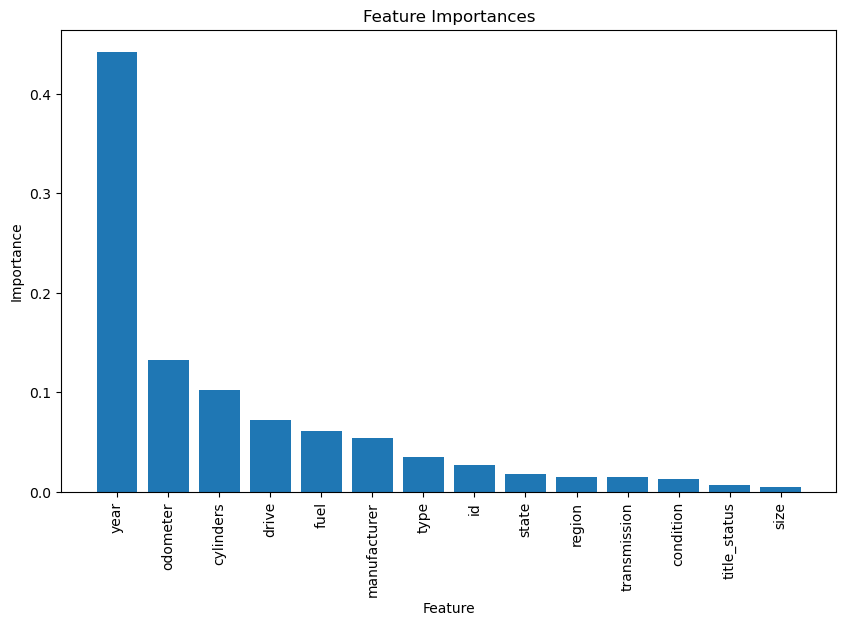

In [224]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Get the list of feature names
feature_names = Z_X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After multiple model attempts, I was able to develop a model with an R-square value of 0.902, which indicates strong performance. It took a good amount of work to reach this point, with some key findings along the way. Including: 
- Sparse Dataset: The biggest challenge for this model was dealing with the null values in the dataset. In total, ~75% of the rows had a null value. And many of the columns had ~30-50% null values. At first, I tried various pre-processing steps like one-hot encoding, standardizing the valus, and an ordinal transformer. However, these steps did not have much impact on the performance of the model. Eventually, I used a label-encoder data pre-processing which resulted in significant improvement in the model. 
- Model Type: I tried LinearRegression and RandomForest models with different parameter optimization techniques. Ultimately, the RandomForest model worked the best but only after I used Label-Encoding for the data pre-processing. 

Ultimately, data preparation and having a high enough quality dataset has the most impact. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Dear Client, 

After evaluating the historical dataset with multiple machine-learning models, we can predict the price of a used car within ~$3,500. The machine-learning model prioritized car-factors that were not always the most intuitive, meaning that it was able to identify insights we would normally miss. 

Given the data we had available, the Year, Miles, Cylinders, Drive, and Fuel Type had the greatest impact on the price of the car, whereas things like the title_status, condition, and size were less important to our overall model. These factors are probably counter-intuitive to what you would have predicted. However, the results are largely due to the distribution of information in our dataset. There was not a strong enough diversity of values for the condition, title_status, and size for our model to use them as key factors in the prediction.

Thus, we believe our model will be a valuable tool to drive predictive insights that you not be readily apparent. While you are evaluating whether to purchase a car, our model can be used to predict the price with a strong accuracy. We hope that you can use the information to make the best decisions for your car lot ! 